In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")


Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape


(1338, 7)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.duplicated().sum()


1

In [15]:
df = df.drop_duplicates()


In [17]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

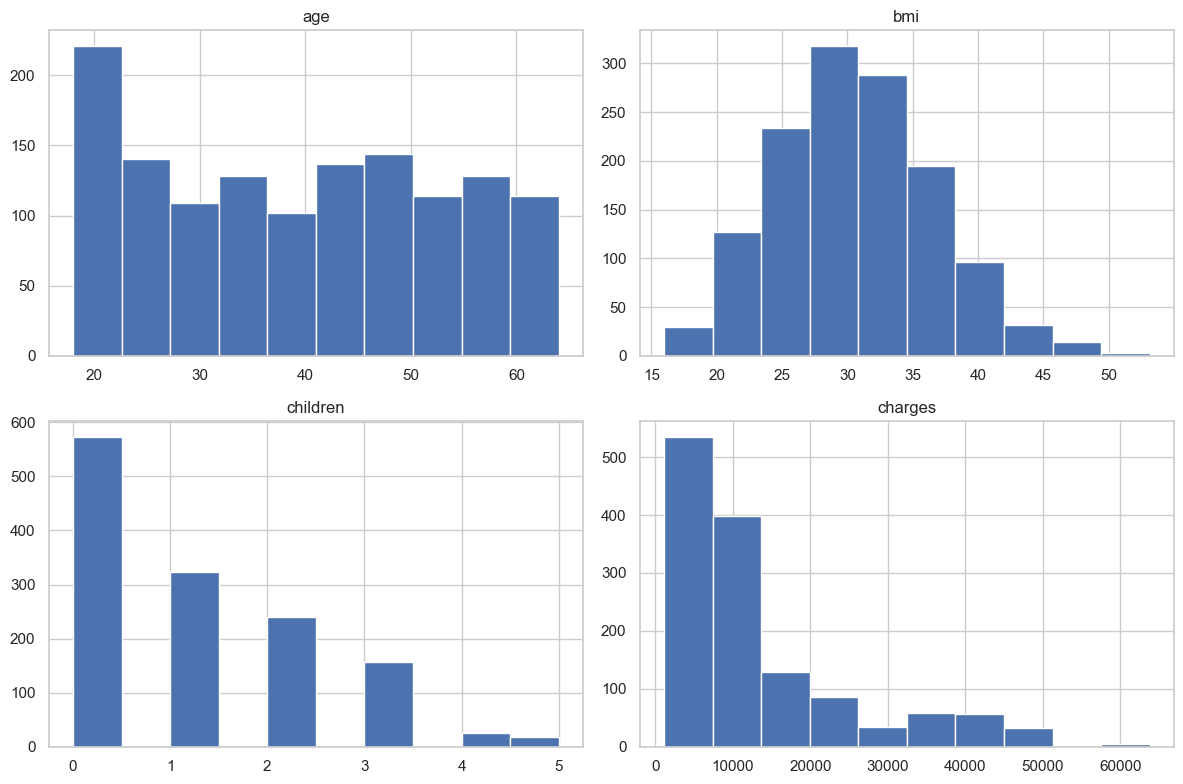

In [19]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


In [23]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.head()


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

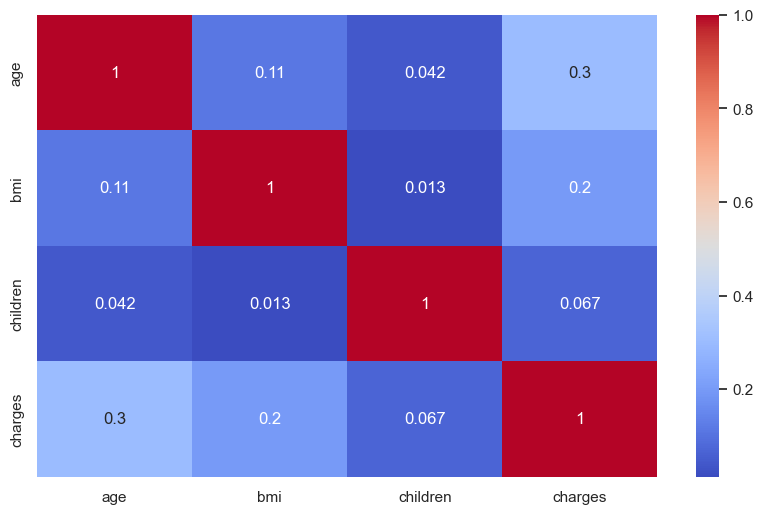

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()



In [63]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.head()




,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


<Figure size 640x480 with 0 Axes>

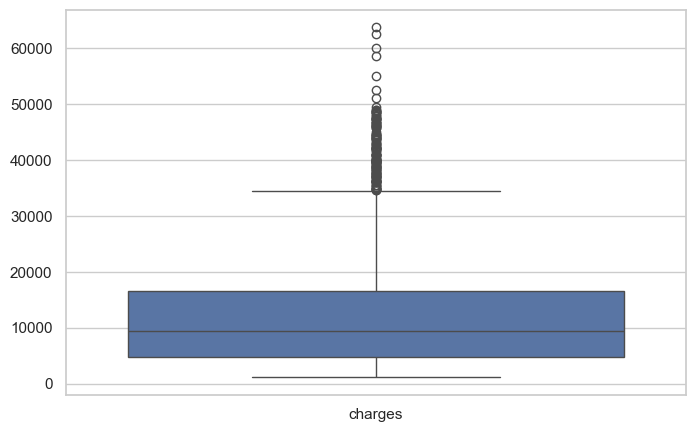

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['charges']])
plt.show()
plt.savefig('charges_boxplot.png', dpi=300, bbox_inches='tight')


In [29]:
df.groupby('smoker')['charges'].mean()


smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

In [31]:
df.groupby('region')['charges'].mean()


region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

<Figure size 640x480 with 0 Axes>

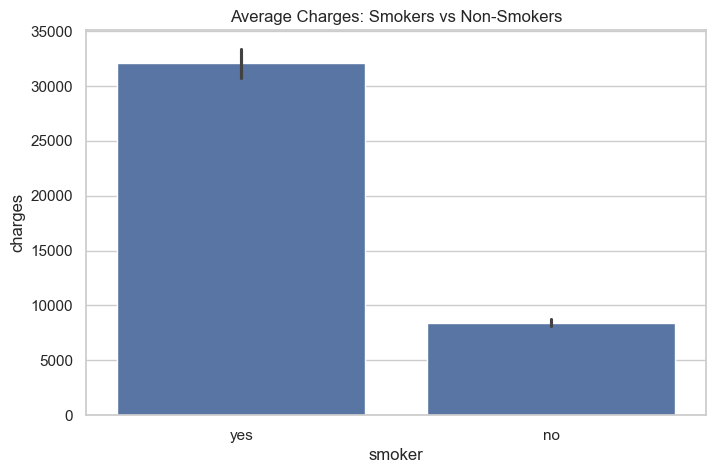

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Average Charges: Smokers vs Non-Smokers')
plt.show()
plt.savefig('charges_by_smoker.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

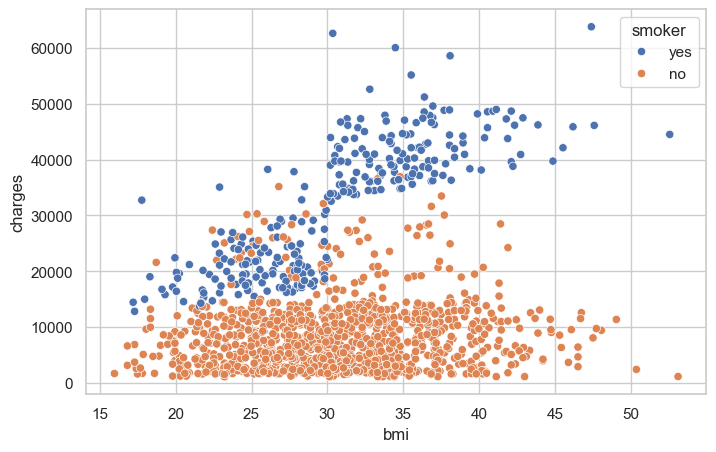

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker')
plt.show()
plt.savefig('charges_by_bmi_scatter.png', dpi=300, bbox_inches='tight')


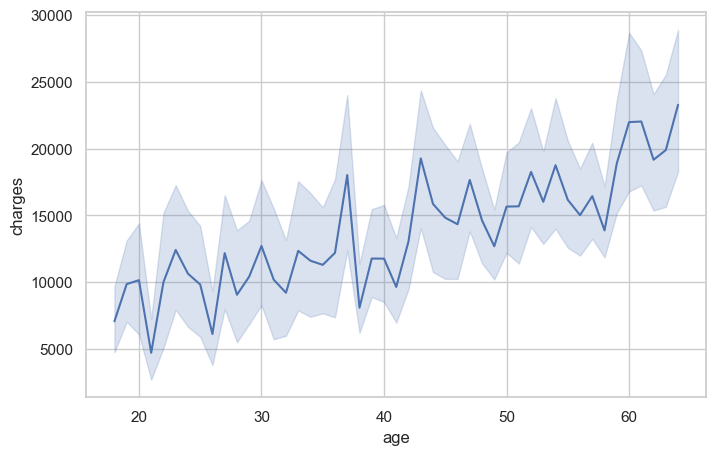

In [51]:
plt.figure(figsize=(8,5))
sns.lineplot(x='age', y='charges', data=df)
plt.show()
plt.savefig('charges_by_age_linechart.png', dpi=300, bbox_inches='tight')
